In [1]:
import nltk
import pandas as pd
import numpy as np
from lyricsgenius import Genius
from nltk.corpus import wordnet
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from flair.models import TextClassifier
from flair.data import Sentence
from langdetect import detect

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
client_access_token = "Z3u3rLvxxvbdSNOItyy-u0IZ60q-5JQqMj_sVIo2tyggpxAk3xPBGSBJMwKlQEeI"

/home/plasma/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
[nltk_data] Downloading package wordnet to /home/plasma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/plasma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/plasma/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv('muse_v3.csv').astype({'valence_tags': np.float32, 'arousal_tags':np.float32, 'dominance_tags':np.float32})
df = df.sample(frac=1).reset_index(drop=True) #randomize row order
df['lyrics'] = ""
df['lemma_lyrics'] = ""
df['textblob_sent'] = 0.0
df['textblob_sent_lemma'] = 0.0
df['vader_sent'] = 0.0
df['vader_sent_lemma'] = 0.0
df['flair_sent'] = 0.0
df['flair_sent_lemma'] = 0.0
df[:10]

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,lyrics,lemma_lyrics,textblob_sent,textblob_sent_lemma,vader_sent,vader_sent_lemma,flair_sent,flair_sent_lemma
0,https://www.last.fm/music/tom%2brule/_/decembe...,December Thoughts,Tom Rule,['thoughtful'],2,7.075000,2.110000,7.030000,NaN,4MvHisw8YsuiTzYZ31IFXx,piano,,,0.0,0.0,0.0,0.0,0.0,0.0
1,https://www.last.fm/music/nicolas%2bcollins/_/...,"Broken Light III, Torelli",Nicolas Collins,"['bitter', 'delicate', 'intimate', 'euphoric',...",12,4.766364,3.860909,4.575455,NaN,NaN,classical,,,0.0,0.0,0.0,0.0,0.0,0.0
2,https://www.last.fm/music/the%2belected/_/don%...,Don't Blow It,The Elected,['wistful'],4,6.480000,4.107500,5.268750,feafa40d-771b-4827-aa20-9bc0a771c3a2,NaN,indie pop,,,0.0,0.0,0.0,0.0,0.0,0.0
3,https://www.last.fm/music/nordvargr/_/hascimh,Hascimh,Nordvargr,['spooky'],1,4.400000,6.000000,4.480000,0cc5fe11-d3e5-4682-bed9-3de1328f2b03,1OYmcRO5jeKQJbYmQQiK9z,NaN,,,0.0,0.0,0.0,0.0,0.0,0.0
4,https://www.last.fm/music/ang%25c3%25a8le%2bdu...,Gymnopédie No.1 (Erik Satie),Angèle Dubeau & La Pietà,['poignant'],2,6.355000,4.605000,6.445000,NaN,NaN,NaN,,,0.0,0.0,0.0,0.0,0.0,0.0
5,https://www.last.fm/music/empire%2bof%2bthe%2b...,I'll Be Around,Empire of the Sun,['calm'],5,5.092857,2.988571,4.432857,92103b30-21de-428d-854b-169f32f2e2f9,4DCCMtWcfWWlGg4EIK79Md,pop,,,0.0,0.0,0.0,0.0,0.0,0.0
6,https://www.last.fm/music/hot%2bchip/_/take%2b...,Take Care,Hot Chip,['dreamy'],3,7.623226,4.889678,6.187097,308d82c8-2b55-4fc3-a98d-f8831e591270,5I2MFC1Q2yIYSKif1ki5qU,electronic,,,0.0,0.0,0.0,0.0,0.0,0.0
7,https://www.last.fm/music/k%2527s%2bchoice/_/2...,20.000 Seconds,K's Choice,['light'],5,4.252000,3.878000,4.700000,NaN,4KzZ5dq0a1xWwY49Ynal2U,rock,,,0.0,0.0,0.0,0.0,0.0,0.0
8,https://www.last.fm/music/lana%2bdel%2brey/_/p...,Pretty When You Cry,Lana Del Rey,['sad'],3,5.478000,4.500000,4.968000,5afe7aad-1431-4e1b-a4c7-2ff414e58cb8,6PnluwP0fjGnpIBsqTdUTq,alternative,,,0.0,0.0,0.0,0.0,0.0,0.0
9,https://www.last.fm/music/sattyananda/_/the%2b...,The Rain Song,Sattyananda,['organic'],1,5.550000,4.290000,6.170000,NaN,45nZznaII3hbhfZDXwBVfF,electronic,,,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
all_genres = set(df['genre'].unique())
'Rap' in all_genres

False

In [4]:
print("'")

'


In [5]:
sent = TextBlob("adshkbd ahjdba wdjh daih adhas djhad ajhsd asjdh asd aisdh asjhd ").sentiment
print(sent.polarity)


0.0


In [6]:
vader_analyzer = SentimentIntensityAnalyzer()
vader_analyzer.polarity_scores("I hate dogs so much")['compound']

-0.5719

In [7]:
genres = set()
for genre in df['genre']:
    genres.add(genre)
print(genres)

{nan, 'video game music', 'taiko', 'kora', 'swedish metal', 'french', 'fast melodic punk', 'environmental', 'synth-pop', 'glitch', 'native american', 'lute', 'jazz rock', 'death industrial', 'guitar', 'atmospheric black metal', 'field recording', 'pop rap', 'ragtime', 'jazz guitar', 'marching band', 'ragga jungle', 'symphonic metal', 'garage rock revival', 'gnawa', 'stoner metal', 'soundtrack', 'estonian metal', 'nasheed', 'frenchcore', 'russian indie', 'balafon', 'speedcore', 'contemporary country', 'progressive black metal', 'anti-folk', 'pop', 'turkish pop', 'britpop', 'avant-garde metal', 'power electronics', 'dark folk', 'smooth soul', 'carnaval', 'power noise', 'hammond organ', 'prank', 'bolero', 'contemporary folk', 'party', 'grime', 'avant-rock', 'uk pop', 'outlaw country', 'lovers rock', 'russian pop', 'digital hardcore', 'easy listening', 'funk metal', 'vocal house', 'doo-wop', '8-bit', 'industrial noise', 'enka', 'melodic metalcore', 'byzantine', 'melodic black metal', 'loun

In [3]:
def get_flair_sentiment(text, classifier):
    sentences = nltk.tokenize.sent_tokenize(text)
    sentiment = 0
    for sentence in sentences:
        flair_sentence = Sentence(sentence)
        classifier.predict(flair_sentence)
        dictionary = flair_sentence.to_dict()
        if dictionary['labels'][0]['value'] == 'POSITIVE':
            sentiment += dictionary['labels'][0]['confidence']
        else:
            sentiment += (-1*(dictionary['labels'][0]['confidence']))
    return sentiment/len(sentences)

In [4]:
def tag_to_wordnet(tag):
    if tag[0] == ('J') or tag[0] == 's':
        return wordnet.ADJ
    if tag[0] == ('V'):
        return wordnet.VERB
    if tag[0] == ('N'):
        return wordnet.NOUN
    if tag[0] == ('R'):
        return wordnet.ADV
    return None

In [5]:

def preprocess_lyrics(lyrics, lemmatizer):
    words = nltk.word_tokenize(lyrics)
    tagged_words = nltk.pos_tag(words)
    lemmatized_words = []
    for word,tag in tagged_words:
        if word:
            wordnet_tag = tag_to_wordnet(tag)
            if wordnet_tag:
                lemmatized_words.append(lemmatizer.lemmatize(word,wordnet_tag))
            else:
                lemmatized_words.append(lemmatizer.lemmatize(word))
    return " ".join(lemmatized_words)

In [6]:
print(preprocess_lyrics("I looked into the water and waved at the reflection!",nltk.stem.WordNetLemmatizer()))

I look into the water and wave at the reflection !


In [7]:
artist = df.iloc[0]['artist']
track = df.iloc[0]['track']

In [8]:
genius = Genius(client_access_token)
song = genius.search_song("The real slim Shady","Eminem")
print(song.lyrics)

Searching for "The real slim Shady" by Eminem...
Done.
[Intro]
May I have your attention, please?
May I have your attention, please?
Will the real Slim Shady please stand up?
I repeat, will the real Slim Shady please stand up?
We're gonna have a problem here...

[Verse 1]
Y'all act like you never seen a white person before
Jaws all on the floor like Pam like Tommy just burst in the door
And started whoopin' her ass worse than before
They first were divorced, throwin' her over furniture (Agh!)
It's the return of the "Oh, wait, no way, you're kidding
He didn't just say what I think he did, did he?"
And Dr. Dre said… nothing, you idiots!
Dr. Dre's dead, he's locked in my basement (Ha ha!)
Feminist women love Eminem
"Chicka, chicka, chicka, Slim Shady, I'm sick of him
Look at him, walkin' around, grabbin' his you-know-what
Flippin' the you-know-who," "Yeah, but he's so cute though"
Yeah, I probably got a couple of screws up in my head loose
But no worse than what's goin' on in your parents

In [9]:
#test lemmatization
artist = df.iloc[0]['artist']
track = df.iloc[0]['track']
lyrics = genius.search_song(track,artist).lyrics
print(preprocess_lyrics(lyrics,nltk.stem.WordNetLemmatizer()))

Searching for "December Thoughts" by Tom Rule...
Done.
[ Intro : Tim Westwood & Juice WRLD ] Youtube.com/TimWestwoodTV Yo , it 's TimWestwoodTV , up at Capital Xtra Got my man Juice WRLD in the building It 's time to shut down the city again Last freestyle : epic , crazy number , big freestyle of the year We 're about to go in This time , nothing but Eminem beat Understand what 's about to go down : The next hour , the world be yours , let 's do it It 's live ? Already ? Cool , uh-huh We 're back on Westwood , bitch Huh [ Verse 1 ] Freestyle king , I'ma do my thing Married to the game , I'ma need a ring Run up on me , that chopper sing Brand new bitch , that 's a brand new thing Broke up with my bitch , now she my side bitch Text me on my side-kick , huh , yeah She gon ' keep the strap in her purse like a dyke bitch Run up , she fire shit , uh , yeah Nigga , just lose it , niggas be faker than optical illusion Run up on me , that chopper skip to conclusion I do n't give a fuck with you

In [10]:
lemmatizer = nltk.stem.WordNetLemmatizer()
vader_analyzer = SentimentIntensityAnalyzer()
flair_classifier = TextClassifier.load('en-sentiment')

2021-12-17 12:09:09,477 loading file /home/plasma/.flair/models/sentiment-en-mix-distillbert_4.pt


In [21]:

for i in range(0,5000):
    print(i)
    artist = df.iloc[i]['artist']
    track = df.iloc[i]['track']
    lyrics = ""
    try:
        lyrics = genius.search_song(track,artist).lyrics
    except BaseException: #if any error is thrown when getting the lyrics or lyrics not found
        lyrics = None
    if not lyrics or len(lyrics)> 15000 or detect(lyrics)!="en" :
        continue
    processed_lyrics = preprocess_lyrics(lyrics,lemmatizer)
    df.loc[i,'lemma_lyrics'] = processed_lyrics
    df.loc[i,'lyrics'] = lyrics
    #sentiment analysis part
    
    #TextBlob
    df.loc[i,'textblob_sent'] = TextBlob(lyrics).sentiment.polarity
    df.loc[i,'textblob_sent_lemma'] = TextBlob(processed_lyrics).sentiment.polarity #polarity represents how negative or positive the text is
    #Vader
    df.loc[i,'vader_sent'] = vader_analyzer.polarity_scores(lyrics)['compound']
    df.loc[i,'vader_sent_lemma']  = vader_analyzer.polarity_scores(processed_lyrics)['compound']
    #Flair
    df.loc[i,'flair_sent'] = get_flair_sentiment(lyrics,flair_classifier)
    df.loc[i,'flair_sent_lemma'] = get_flair_sentiment(processed_lyrics,flair_classifier)

print(df[:4])

0
Searching for "Posed By Models" by Young Marble Giants...
Done.
1
Searching for "small mr man pants (w/ andrew broder and orvar smarason)" by Odd Nosdam...
No results found for: 'small mr man pants (w/ andrew broder and orvar smarason) Odd Nosdam'
2
Searching for "Introduction" by Nick Drake...
Specified song does not contain lyrics. Rejecting.
3
Searching for "O Holy Jesus" by The Cathedral Singers...
Done.
4
Searching for "Ушла" by Аукцыон...
Done.
5
Searching for "Melodica (original mix)" by Leama...
Done.
6
Searching for "Laura" by Oscar Peterson...
Done.
7
Searching for "10 - Naive (Big Weekend)" by The Kooks...
No results found for: '10 - Naive (Big Weekend) The Kooks'
8
Searching for "Stay the Night" by James Blunt...
Done.
9
Searching for "The Gambler" by fun....
Done.
10
Searching for "Widdlecombe Fair (Caister Norfolk)" by Tom Brown...
No results found for: 'Widdlecombe Fair (Caister Norfolk) Tom Brown'
11
Searching for "Forever and Ever" by Project Divinity...
Done.
12
Sea

KeyboardInterrupt: 

In [127]:
text = "As Twitter offers a fertile ground for expressing different thoughts and opinions, it can be seen as a valuable tool for sentiment analysis. Furthermore, properly identified reviews present a baseline of information as an input to different systems, such as e-learning systems, decision support systems etc."
processed_text = preprocess_lyrics(text,lemmatizer)
sentences = nltk.tokenize.sent_tokenize(text)
processed_sentences = nltk.tokenize.sent_tokenize(processed_text)
print(processed_sentences)

['As Twitter offer a fertile ground for express different thought and opinion , it can be see a a valuable tool for sentiment analysis .', 'Furthermore , properly identify review present a baseline of information a an input to different system , such a e-learning system , decision support system etc .']


In [168]:
df.loc[0]

lastfm_url                https://www.last.fm/music/eminem/_/%2527till%2...
track                                                      'Till I Collapse
artist                                                               Eminem
seeds                                                        ['aggressive']
number_of_emotion_tags                                                    6
valence_tags                                                           4.55
arousal_tags                                                       5.273125
dominance_tags                                                     5.690625
mbid                                   cab93def-26c5-4fb0-bedd-26ec4c1619e1
spotify_id                                           4xkOaSrkexMciUUogZKVTS
genre                                                                   rap
lyrics                                                                     
lemma_lyrics                                                               
textblob_sen

In [170]:
i = 0
artist = df.iloc[i]['artist']
track = df.iloc[i]['track']
lyrics = ""
try:
    lyrics = genius.search_song(track,artist).lyrics
except BaseException: #if any error is thrown when getting the lyrics or lyrics not found
    lyrics = None
if not lyrics:
    print("No lyrics")
processed_lyrics = preprocess_lyrics(lyrics,lemmatizer)
df.loc[i,'lemma_lyrics'] = processed_lyrics
#sentiment analysis part
    
#TextBlob
df.loc[i,'textblob_sent'] = TextBlob(lyrics).sentiment.polarity
df.loc[i,'textblob_sent_lemma'] = TextBlob(processed_lyrics).sentiment.polarity #polarity represents how negative or positive the text is
#Vader
df.loc[i,'vader_sent'] = vader_analyzer.polarity_scores(lyrics)['compound']
df.loc[i,'vader_sent_lemma']  = vader_analyzer.polarity_scores(processed_lyrics)['compound']
#Flair
df.loc[i,'flair_sent'] = get_flair_sentiment(lyrics,flair_classifier)
df.loc[i,'flair_sent_lemma'] = get_flair_sentiment(processed_lyrics,flair_classifier)

Searching for "'Till I Collapse" by Eminem...
Done.


In [11]:
def calculate_sentiment_genres(genres):
    genres = [genre.lower() for genre in genres]
    genre_set= set(genres)
    for i in range(0,90000):
        if df.iloc[i]['genre'] not in genre_set or df.iloc[i]['lyrics'] != "":
            continue
        print(i)
        artist = df.iloc[i]['artist']
        track = df.iloc[i]['track']
        lyrics = ""
        try:
            lyrics = genius.search_song(track,artist).lyrics
        except BaseException: #if any error is thrown when getting the lyrics or lyrics not found
            lyrics = None
        if not lyrics or len(lyrics)> 15000 or detect(lyrics)!="en" :
            continue
        processed_lyrics = preprocess_lyrics(lyrics,lemmatizer)
        df.loc[i,'lemma_lyrics'] = processed_lyrics
        df.loc[i,'lyrics'] = lyrics
    #sentiment analysis part
    
        #TextBlob
        df.loc[i,'textblob_sent'] = TextBlob(lyrics).sentiment.polarity
        df.loc[i,'textblob_sent_lemma'] = TextBlob(processed_lyrics).sentiment.polarity #polarity represents how negative or positive the text is
        #Vader
        df.loc[i,'vader_sent'] = vader_analyzer.polarity_scores(lyrics)['compound']
        df.loc[i,'vader_sent_lemma']  = vader_analyzer.polarity_scores(processed_lyrics)['compound']
        #Flair
        df.loc[i,'flair_sent'] = get_flair_sentiment(lyrics,flair_classifier)
        df.loc[i,'flair_sent_lemma'] = get_flair_sentiment(processed_lyrics,flair_classifier)

def calculate_sentiment_artists(artists):
    artist_set= set(artists)
    for i in range(0,90000):
        if df.iloc[i]['artist'] not in artist_set or df.iloc[i]['lyrics'] != "":
            continue
        print(i)
        artist = df.iloc[i]['artist']
        track = df.iloc[i]['track']
        lyrics = ""
        try:
            lyrics = genius.search_song(track,artist).lyrics
        except BaseException: #if any error is thrown when getting the lyrics or lyrics not found
            lyrics = None
        if not lyrics or len(lyrics)> 15000 or detect(lyrics)!="en" :
            continue
        processed_lyrics = preprocess_lyrics(lyrics,lemmatizer)
        df.loc[i,'lemma_lyrics'] = processed_lyrics
        df.loc[i,'lyrics'] = lyrics
    #sentiment analysis part
    
        #TextBlob
        df.loc[i,'textblob_sent'] = TextBlob(lyrics).sentiment.polarity
        df.loc[i,'textblob_sent_lemma'] = TextBlob(processed_lyrics).sentiment.polarity #polarity represents how negative or positive the text is
        #Vader
        df.loc[i,'vader_sent'] = vader_analyzer.polarity_scores(lyrics)['compound']
        df.loc[i,'vader_sent_lemma']  = vader_analyzer.polarity_scores(processed_lyrics)['compound']
        #Flair
        df.loc[i,'flair_sent'] = get_flair_sentiment(lyrics,flair_classifier)
        df.loc[i,'flair_sent_lemma'] = get_flair_sentiment(processed_lyrics,flair_classifier)

In [12]:
calculate_sentiment_genres(["metal","r&b","folk"])
#"country", "hip-hop","contemporary jazz", "blues", "rock", "experimental", "metal","r&b","folk","rap/"

84
Searching for "Sadistikal" by Danzig...
Done.
102
Searching for "Metropolis" by The Pogues...
Specified song does not contain lyrics. Rejecting.
103
Searching for "Night Terror (Pavor Nocturnus)" by Blotted Science...
Done.
111
Searching for "Gänseblümchen" by J.B.O....
133
Searching for "Where The Lonely Souls Go" by Hagalaz' Runedance...
Done.
156
Searching for "Miriam" by Norah Jones...
Done.
163
Searching for "A Hundred Years" by Tracy Chapman...
Done.
166
Searching for "Not Satisfied" by The violent husbands...
Done.
181
Searching for "We Learned The Sea" by Dar Williams...
Done.
189
Searching for "Night Ride Home" by Joni Mitchell...
Done.
203
Searching for "A Thousand Years" by Azure Ray...
Done.
207
Searching for "Something Beautiful" by Great Big Sea...
Done.
256
Searching for "Fillthee" by Otep...
Done.
274
Searching for "Crazy Man Michael" by Natalie Merchant...
Done.
311
Searching for "Barking at the Moon (Soundtrack)" by Jenny Lewis...
Done.
329
Searching for "Re: Stack

In [180]:
df['artist'].nunique()

26012

In [181]:
df.iloc[0:10]

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,lyrics,lemma_lyrics,textblob_sent,textblob_sent_lemma,vader_sent,vader_sent_lemma,flair_sent,flair_sent_lemma
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap,,[ Intro : Eminem ] 'Cause sometimes you just f...,-0.045686,-0.012063,-0.9944,-0.9951,-0.159126,-0.262268
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal,,[ Verse ] Saint Anger 'round my neck Saint Ang...,-0.321575,-0.297039,-0.9992,-0.9993,-0.095738,-0.072000
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap,,[ Intro : Rick Ross ] Legendary Runners You kn...,0.133909,0.133909,0.9480,0.9737,-0.999637,-0.999840
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop,,"[ Intro ] Road runner , road runner Going hund...",-0.062335,-0.065536,0.9701,0.9812,0.562925,0.640141
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771177,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal,,Die ! [ Verse ] I do n't need your forgiveness...,-0.481035,-0.481035,-0.9998,-0.9998,-0.702031,-0.641719
5,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,['aggressive'],9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,4Q1w4Ryyi8KNxxaFlOQClK,metal,,"[ Intro ] One , two , three , go ! [ Verse 1 ]...",-0.014527,-0.037016,0.9575,0.9563,0.297424,0.315605
6,https://www.last.fm/music/kanye%2bwest/_/feedback,Feedback,Kanye West,['aggressive'],1,3.080000,5.870000,5.490000,NaN,49fT6owWuknekShh9utsjv,hip-hop,,"[ Chorus ] Ayy , ya hear about the good news ?...",0.141057,0.162426,0.9658,0.9732,-0.112662,0.036590
7,https://www.last.fm/music/deftones/_/7%2bwords,7 Words,Deftones,"['aggressive', 'angry']",10,3.807121,5.473939,4.729091,1a826083-5585-445f-a708-415dc90aa050,6DoXuH326aAYEN8CnlLmhP,nu metal,,"[ Verse 1 ] I 'll never be the same , break de...",-0.188605,-0.179162,-0.9999,-0.9999,-0.528519,-0.451526
8,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,"['aggressive', 'angry', 'bitter']",20,3.737211,5.610204,4.626735,4435982c-b83e-4daa-af2b-9f3430036bb7,104YdibC7VQy78xAVmgRYr,singer-songwriter,,"[ Verse 1 ] You wan na make me sick , you wan ...",-0.111548,-0.119589,-0.9969,-0.9853,-0.081627,-0.866962
9,https://www.last.fm/music/metallica/_/sweet%2b...,Sweet Amber,Metallica,['aggressive'],4,3.582759,5.757241,5.340000,fe1cc051-faa7-4953-b331-f6196cd3ddae,5fU6qjmD38P90BMsuqpiuU,metal,,[ Verse 1 ] Wash your back so you do n't stab ...,0.242893,0.231502,0.9973,0.9972,0.787943,0.341907


In [182]:
df.to_csv('partialcsv.csv', index = False)

In [195]:
df.iloc[25:30]

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,lyrics,lemma_lyrics,textblob_sent,textblob_sent_lemma,vader_sent,vader_sent_lemma,flair_sent,flair_sent_lemma
25,https://www.last.fm/music/a%2bflock%2bof%2bsea...,Standing in the Doorway,A Flock of Seagulls,['exciting'],1,7.950000,6.950000,7.21000,9514ad3b-b995-4ac9-bbe2-0ca0a2973df2,4pkEoiyCaOtwxUL8C6IGkS,new wave,I can see you standing outside\nSee your shado...,I can see you stand outside See your shadow on...,-0.058333,-0.058333,0.6124,0.6124,-0.590647,-0.691504
26,https://www.last.fm/music/tiger%2blou/_/nation...,National Ave,Tiger Lou,['reflective'],3,5.400000,3.060000,6.08000,72e814fd-a2f5-4049-9e36-451811f487f0,3qvA3ZBRYgZ6ci2YItP4Ye,indie,Where do you wanna go?\nI wanna go home\nHome ...,Where do you wan na go ? I wan na go home Home...,0.250000,-0.087500,-0.2500,-0.2500,0.780610,0.751677
27,https://www.last.fm/music/eufonius/_/wish,wish,eufonius,['pure'],1,6.800000,4.050000,6.44000,941100ab-9e8a-4f7d-9218-42aa6f543e0c,NaN,j-pop,CHAPTER TWO\n\nTHE MYSTERIES OF ALBERTINE — TH...,CHAPTER TWO THE MYSTERIES OF ALBERTINE — THE G...,0.101581,0.101506,0.0000,0.0000,0.000000,0.000000
28,https://www.last.fm/music/jon%2bhassell/_/char...,Charm (Over Burundi Cloud),Jon Hassell,['sophisticated'],8,6.163750,3.881250,6.02375,NaN,NaN,soundtrack,,,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000
29,https://www.last.fm/music/hard-fi/_/help%2bme%...,Help Me Please,Hard-Fi,"['romantic', 'soft']",6,5.697227,3.487815,5.83395,NaN,NaN,indie,,,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000


In [32]:
print(all_genres)

{nan, 'video game music', 'taiko', 'kora', 'swedish metal', 'french', 'fast melodic punk', 'environmental', 'synth-pop', 'glitch', 'native american', 'lute', 'jazz rock', 'death industrial', 'guitar', 'atmospheric black metal', 'jazz guitar', 'field recording', 'ragtime', 'pop rap', 'marching band', 'ragga jungle', 'symphonic metal', 'gnawa', 'garage rock revival', 'stoner metal', 'soundtrack', 'estonian metal', 'nasheed', 'russian indie', 'frenchcore', 'balafon', 'speedcore', 'contemporary country', 'progressive black metal', 'anti-folk', 'pop', 'turkish pop', 'britpop', 'avant-garde metal', 'power electronics', 'dark folk', 'smooth soul', 'carnaval', 'power noise', 'hammond organ', 'prank', 'bolero', 'contemporary folk', 'party', 'grime', 'uk pop', 'avant-rock', 'outlaw country', 'lovers rock', 'russian pop', 'digital hardcore', 'easy listening', 'funk metal', 'vocal house', 'doo-wop', '8-bit', 'industrial noise', 'enka', 'melodic metalcore', 'byzantine', 'melodic black metal', 'loun

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,lyrics,lemma_lyrics,textblob_sent,textblob_sent_lemma,vader_sent,vader_sent_lemma,flair_sent,flair_sent_lemma
84,https://www.last.fm/music/danzig/_/sadistikal,Sadistikal,Danzig,['aggressive'],1,0.308000,5.870000,5.490000,31366cb1-d8d1-424a-8009-e4060972e65b,5WhSrZM7mrnUbaHBQcJ0KY,metal,"Deep, the lies\nI know they lie\nAs the night ...","Deep , the lie I know they lie As the night mu...",0.529444,0.529444,0.01385,0.0174,0.925917,0.925840
103,https://www.last.fm/music/blotted%2bscience/_/...,Night Terror (Pavor Nocturnus),Blotted Science,['technical'],1,0.500000,5.280000,6.240000,NaN,NaN,metal,,,0.500000,0.500000,0.50000,0.5000,0.500000,0.500000
111,https://www.last.fm/music/j.b.o./_/g%25c3%25a4...,Gänseblümchen,J.B.O.,['angry'],1,0.253000,6.200000,4.110000,e6a91cf6-b4a8-4430-9b65-2086cbab5667,5J1uAxyEtQibtD61twZuKd,metal,,,0.500000,0.500000,0.50000,0.5000,0.500000,0.500000
256,https://www.last.fm/music/otep/_/fillthee,Fillthee,Otep,['angry'],3,0.334600,6.240500,4.600500,dc5a4c6b-35c5-4afd-9109-256b7deb9f61,0AWMwRNXNc0bX2sPLWrxX7,metal,Lying naked\nAlone on the bathroom floor\nEvac...,Lying naked Alone on the bathroom floor Evacua...,0.530707,0.488951,0.00640,0.0074,0.008879,0.018565
367,https://www.last.fm/music/l.a.%2bguns/_/suffra...,Suffragette City,L.A. Guns,['sleazy'],1,0.385000,5.640000,4.600000,5ca7d082-4ab5-4876-878c-6a3b69416c50,5GbwGWcyzhBJlVOAUJ2gz6,metal,"Hey man oh leave me alone, you know\nHey man o...","Hey man oh leave me alone , you know Hey man o...",0.502267,0.505838,0.85160,0.8516,0.416288,0.494119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89693,https://www.last.fm/music/backwordz/_/self%2bo...,Self Ownership,BackWordz,['lyrical'],1,0.684000,3.810000,5.760000,NaN,10u5qDyt9cTEg7QxQ8eBLQ,metal,[Intro]\nFrom the willfully ignorant the knowl...,[ Intro ] From the willfully ignorant the know...,0.480189,0.478774,0.01765,0.0389,0.127124,0.139479
89790,https://www.last.fm/music/vargotah/_/dirty%2bb...,Dirty Black Summer (Danzig Cover),Vargotah,"['negative', 'strong']",15,0.500571,4.544286,4.787143,NaN,NaN,metal,,,0.500000,0.500000,0.50000,0.5000,0.500000,0.500000
89805,https://www.last.fm/music/juliana%2bdown/_/fee...,Feel The Same,Juliana Down,['rousing'],2,0.553500,4.960000,5.335000,NaN,NaN,metal,(I really miss you yeah yeah who would've know...,( I really miss you yeah yeah who would 've kn...,0.530914,0.533767,0.99320,0.9932,0.792529,0.828188
89912,https://www.last.fm/music/mudvayne/_/rain.%2bs...,Rain. Sun. Gone,Mudvayne,['angry'],2,0.256333,6.086667,3.943333,NaN,1iucJEoiORwMis2joz7LpB,metal,,,0.500000,0.500000,0.50000,0.5000,0.500000,0.500000


In [65]:
normalized_df = df.copy()
columns = ['textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma']
for column in columns:#min max normalization of sentiments
    normalized_df[column] = (df[column] - (-1))/(1-(-1))

normalized_df['valence_tags'] = (df['valence_tags'] - 0)/(10-0)

genre_table = pd.DataFrame(columns=['genre','valence_tags','textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma'])
genres = ["metal","r&b","folk"]
def average_sentiment_genres(genres,genre_table):#given list of genres, find average sentiment for each one, and return dictionary
    for genre in genres:
        number_songs = len(normalized_df[['valence_tags', 'textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma']][(df['genre'] == genre) & (normalized_df['lyrics'] != "")])
        dictionary = (normalized_df[['valence_tags', 'textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma']][(df['genre'] == genre) & (normalized_df['lyrics'] != "")].sum()/number_songs).to_dict()
        dictionary['genre'] = genre
        print(dictionary)
average_sentiment_genres(genres,genre_table)

{'valence_tags': 0.4233553050893598, 'textblob_sent': 0.5068337219806063, 'textblob_sent_lemma': 0.5085879029338604, 'vader_sent': 0.39505796460176995, 'vader_sent_lemma': 0.39771294247787614, 'flair_sent': 0.44097226100055037, 'flair_sent_lemma': 0.45248775077344927, 'genre': 'metal'}
{'valence_tags': 0.6543767863306506, 'textblob_sent': 0.5772669375280371, 'textblob_sent_lemma': 0.5675719480818819, 'vader_sent': 0.8390439655172414, 'vader_sent_lemma': 0.8442866379310346, 'flair_sent': 0.6390255135920042, 'flair_sent_lemma': 0.6742551503199946, 'genre': 'r&b'}
{'valence_tags': 0.5573716491233301, 'textblob_sent': 0.5457481474527859, 'textblob_sent_lemma': 0.5477812247813919, 'vader_sent': 0.6908769629225736, 'vader_sent_lemma': 0.7017919574700109, 'flair_sent': 0.5652097824681993, 'flair_sent_lemma': 0.5748622540232937, 'genre': 'folk'}


In [37]:
genre_table

,genre,valence_tags,textblob_sent,textblob_sent_lemma,vader_sent,vader_sent_lemma,flair_sent,flair_sent_lemma
0,metal,0.423355,0.506834,0.508588,0.395058,0.397713,0.440972,0.452488
1,r&b,0.654377,0.577267,0.567572,0.839044,0.844287,0.639026,0.674255
2,folk,0.557372,0.545748,0.547781,0.690877,0.701792,0.565210,0.574862


In [30]:
df['flair_sent'].max()

0.9999542236328125

In [ ]:
import seaborn as sb
relevant_data = normalized_df[[['genre','valence_tags', 'textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma']]]
pd_df = pd.DataFrame(your_list, columns=['x_data', 'y_data', 'group_categories'])
sns.barplot(data=pd_df, 
             x='x_data', y='y_data', hue='group_categories', ci=95,
             legend="full", palette="Set1")

In [60]:
relevant_data = normalized_df[['genre','valence_tags', 'textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma']][df["lyrics"]!=""].reset_index()
std = relevant_data.groupby(["genre"])['valence_tags', 'textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma'].std()
std

<ipython-input-60-1ad2496f0228>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = relevant_data.groupby(["genre"])['valence_tags', 'textblob_sent','textblob_sent_lemma','vader_sent','vader_sent_lemma','flair_sent','flair_sent_lemma'].std()


,valence_tags,textblob_sent,textblob_sent_lemma,vader_sent,vader_sent_lemma,flair_sent,flair_sent_lemma
genre,,,,,,,
folk,0.141055,0.081825,0.080179,0.376072,0.374969,0.399804,0.394327
metal,0.145778,0.087502,0.087763,0.433120,0.436192,0.380603,0.376513
r&b,0.105687,0.075158,0.073012,0.347129,0.332682,0.315299,0.307106


In [61]:
import matplotlib.pyplot as plt


ValueError: shape mismatch: objects cannot be broadcast to a single shape

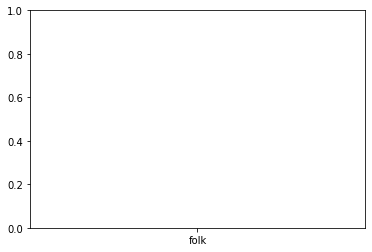